In [59]:
import pandas as pd

import numpy as np


yard_locations = pd.read_excel('masterset.xlsx', sheet_name='Yard Locations')
past_in_out_data = pd.read_excel('masterset.xlsx', sheet_name='Past In and Out Container Data')
incoming_container = pd.read_excel('masterset.xlsx', sheet_name='Incoming Containers')


yard_locations['Location Status'].unique()

def replace_status(value):
    if value == 'null' or pd.isnull(value) or value == '':
        return 0
    elif value == 'GROUNDED':
        return 1
    else:
        return value

# Apply the function to the 'Location Status' column
yard_locations['Location Status'] = yard_locations['Location Status'].apply(replace_status)



#Convert string values to numerals
area_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J':10, 'K': 11, 'L':12}
bay_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4,'E': 5, 'F': 6}

yard_locations['Area'] = yard_locations['Area'].map(area_mapping)
yard_locations['Bay'] = yard_locations['Bay'].map(bay_mapping)
past_in_out_data.dropna(inplace=True)
def map_status(status):
    if status == 'E':
        return 0
    elif status == 'L':
        return 1
    else:
        return -1  # Handle other cases if needed

past_in_out_data['STATUS'] = past_in_out_data['STATUS'].apply(map_status)

yard_locations.dropna(inplace=True)

incoming_container.dropna(inplace=True)



yard_locations['Area'] = yard_locations['Area'].astype(np.int64)

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot empty locations
empty_locations = yard_locations[yard_locations['Location Status'] == 0]
ax.scatter(empty_locations['Row'], empty_locations['Level'], empty_locations['Bay'], c='blue', marker='o', label='Empty')

# Plot grounded locations
grounded_locations = yard_locations[yard_locations['Location Status'] == 1]
ax.scatter(grounded_locations['Row'], grounded_locations['Level'], grounded_locations['Bay'], c='red', marker='x', label='Grounded')

# Set labels and title
ax.set_xlabel('Row')
ax.set_ylabel('Level')
ax.set_zlabel('Bay')
ax.set_title('Container Placement Positions')

# Add a legend
ax.legend()

# Show the plot
plt.show()



import plotly.graph_objs as go

# Create a trace for grounded containers
grounded_locations = yard_locations[yard_locations['Location Status'] == 1]
trace_ground = go.Scatter3d(
    x=grounded_locations['Row'],
    y=grounded_locations['Bay'],
    z=grounded_locations['Level'],
    mode='markers',
    marker=dict(size=5, color='red'),
    name='Grounded'
)

# Create a trace for empty locations
empty_locations = yard_locations[yard_locations['Location Status'] == 0]
trace_empty = go.Scatter3d(
    x=empty_locations['Row'],
    y=empty_locations['Bay'],
    z=empty_locations['Level'],
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Empty'
)

# Create a cuboid shape trace
cuboid_trace = go.Mesh3d(
    x=[1, 1, 27, 27, 1, 1, 27, 27],
    y=[1, 4, 4, 1, 1, 4, 4, 1],
    z=[1, 1, 1, 1, 4, 4, 4, 4],
    opacity=0.2,
    color='rgba(100,100,100,0.2)'
)

# Create the layout
layout = go.Layout(
    scene=dict(
        xaxis_title='Row',
        yaxis_title='Bay',
        zaxis_title='Level',
        aspectmode='cube'
    )
)

# Create the figure
fig = go.Figure(data=[trace_ground, trace_empty, cuboid_trace], layout=layout)

# Show the figure
fig.show()


past_in_out_data.isnull().sum()


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


# Convert OUT_TIME and IN_TIME to datetime data type
past_in_out_data['OUT_TIME'] = pd.to_datetime(past_in_out_data['OUT_TIME'], errors='coerce')

# Calculate time differences
past_in_out_data['TIME_DIFF'] = (past_in_out_data['OUT_TIME'] - past_in_out_data['IN_TIME']).dt.total_seconds()


# Features and target variable
features = ['CON_SIZE', 'STATUS']
target = 'TIME_DIFF'

past_in_out_data.dropna(inplace = True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(past_in_out_data[features], past_in_out_data[target], test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict leaving times
predicted_leaving_times = model.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, predicted_leaving_times)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 161388.26814782113


Mean Absolute Error: 0.012987408754197516
Mean Squared Error: 0.0004929652665987101
Root Mean Squared Error: 0.02220282114053775
R-squared: 0.0876943048371921


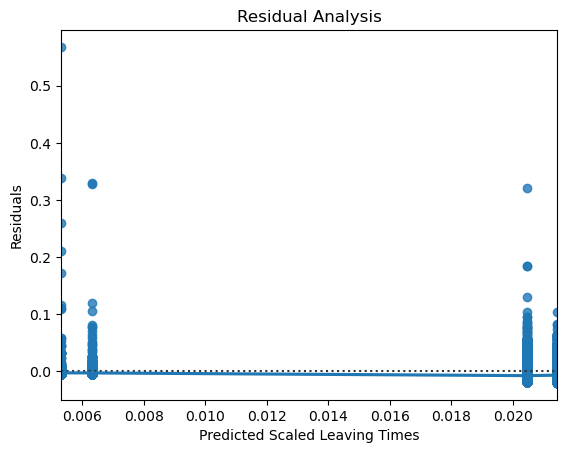

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler


# Convert OUT_TIME and IN_TIME to datetime data type
past_in_out_data['OUT_TIME'] = pd.to_datetime(past_in_out_data['OUT_TIME'], errors='coerce')

# Calculate time differences
past_in_out_data['TIME_DIFF'] = (past_in_out_data['OUT_TIME'] - past_in_out_data['IN_TIME']).dt.total_seconds()
scaler = MinMaxScaler()
past_in_out_data['TIME_DIFF_SCALED'] = scaler.fit_transform(past_in_out_data[['TIME_DIFF']])

# Features and target variable
features = ['CON_SIZE', 'STATUS']
target = 'TIME_DIFF_SCALED'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(past_in_out_data[features], past_in_out_data[target], test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict leaving times
predicted_leaving_times = model.predict(X_test)

# Calculate MAE
predicted_scaled_leaving_times = model.predict(X_test)
mae = mean_absolute_error(y_test, predicted_scaled_leaving_times)
print(f'Mean Absolute Error: {mae}')

# Calculate MSE
mse = mean_squared_error(y_test, predicted_scaled_leaving_times)
print(f'Mean Squared Error: {mse}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# Calculate R-squared
r2 = r2_score(y_test, predicted_scaled_leaving_times)
print(f'R-squared: {r2}')

# Residual Analysis
residuals = y_test - predicted_scaled_leaving_times
sns.residplot(x=predicted_scaled_leaving_times, y=residuals, lowess=True)
plt.xlabel('Predicted Scaled Leaving Times')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()



Mean Absolute Error: 0.015233131080116619
Mean Squared Error: 0.0005958987466751374
Root Mean Squared Error: 0.02441103739448894
R-squared: 0.1402696661475672


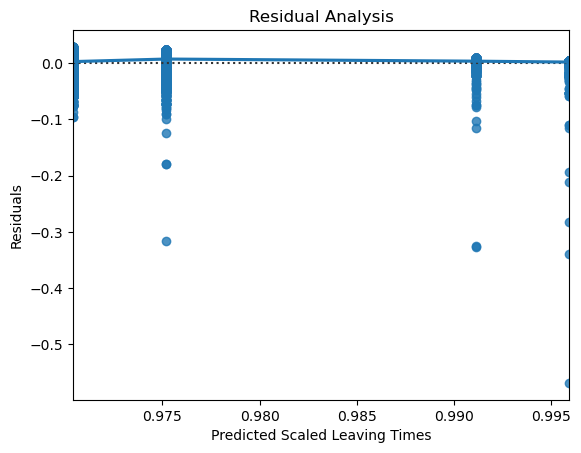

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler


# Convert OUT_TIME, IN_TIME, and VALIDITY to datetime data type
past_in_out_data['OUT_TIME'] = pd.to_datetime(past_in_out_data['OUT_TIME'], errors='coerce')
past_in_out_data['IN_TIME'] = pd.to_datetime(past_in_out_data['IN_TIME'])
past_in_out_data['VALIDITY'] = pd.to_datetime(past_in_out_data['VALIDITY'])

# Calculate time differences in seconds
past_in_out_data['TIME_DIFF'] = (past_in_out_data['VALIDITY'] - past_in_out_data['OUT_TIME']).dt.total_seconds()
scaler = MinMaxScaler()
past_in_out_data['TIME_DIFF_SCALED'] = scaler.fit_transform(past_in_out_data[['TIME_DIFF']])

# Features and target variable
features = ['CON_SIZE', 'STATUS']
target = 'TIME_DIFF_SCALED'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(past_in_out_data[features], past_in_out_data[target], test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict time differences
predicted_time_diff = model.predict(X_test)

# Calculate MAE
predicted_scaled_leaving_times = model.predict(X_test)
mae = mean_absolute_error(y_test, predicted_scaled_leaving_times)
print(f'Mean Absolute Error: {mae}')

# Calculate MSE
mse = mean_squared_error(y_test, predicted_scaled_leaving_times)
print(f'Mean Squared Error: {mse}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# Calculate R-squared
r2 = r2_score(y_test, predicted_scaled_leaving_times)
print(f'R-squared: {r2}')

# Residual Analysis
residuals = y_test - predicted_scaled_leaving_times
sns.residplot(x=predicted_scaled_leaving_times, y=residuals, lowess=True)
plt.xlabel('Predicted Scaled Leaving Times')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()



Mean Absolute Error: 0.012975632560717206
Mean Squared Error: 0.0004930457284334733
Root Mean Squared Error: 0.022204633039829173
R-squared: 0.0875453982202935


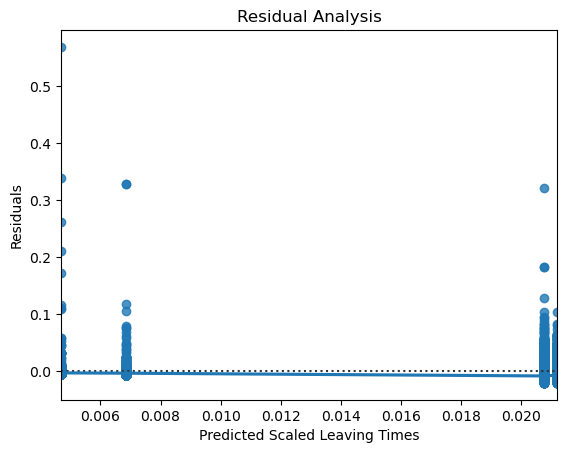

Feature Importance: [0.00796015 0.99203985]


In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# Convert OUT_TIME and IN_TIME to datetime data type
past_in_out_data['OUT_TIME'] = pd.to_datetime(past_in_out_data['OUT_TIME'], errors='coerce')

# Calculate time differences
past_in_out_data['TIME_DIFF'] = (past_in_out_data['OUT_TIME'] - past_in_out_data['IN_TIME']).dt.total_seconds()
scaler = MinMaxScaler()
past_in_out_data['TIME_DIFF_SCALED'] = scaler.fit_transform(past_in_out_data[['TIME_DIFF']])


# Features and target variable
features = ['CON_SIZE', 'STATUS']
target = 'TIME_DIFF_SCALED'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(past_in_out_data[features], past_in_out_data[target], test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict leaving times
predicted_leaving_times = model.predict(X_test)

# Calculate MAE
predicted_scaled_leaving_times = model.predict(X_test)
mae = mean_absolute_error(y_test, predicted_scaled_leaving_times)
print(f'Mean Absolute Error: {mae}')

# Calculate MSE
mse = mean_squared_error(y_test, predicted_scaled_leaving_times)
print(f'Mean Squared Error: {mse}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# Calculate R-squared
r2 = r2_score(y_test, predicted_scaled_leaving_times)
print(f'R-squared: {r2}')

# Residual Analysis
residuals = y_test - predicted_scaled_leaving_times
sns.residplot(x=predicted_scaled_leaving_times, y=residuals, lowess=True)
plt.xlabel('Predicted Scaled Leaving Times')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

# Feature Importance
feature_importance = model.feature_importances_
print(f'Feature Importance: {feature_importance}')


Mean Absolute Error: 0.012976784170692432
Mean Squared Error: 0.0004930401185353407
Root Mean Squared Error: 0.02220450671677578
R-squared: 0.08755578017286181


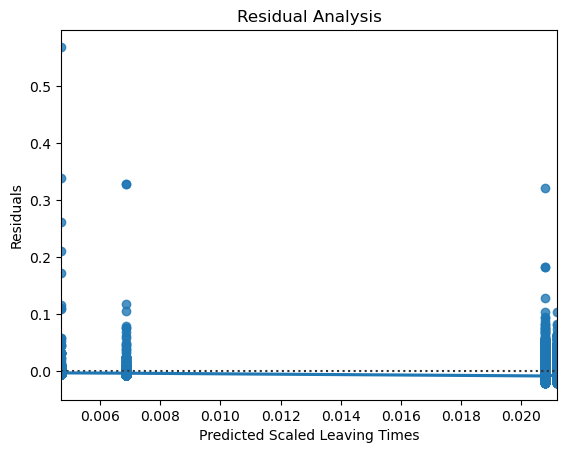

Feature Importance: [7.6069287e-04 9.9923933e-01]


In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# Convert OUT_TIME and IN_TIME to datetime data type
past_in_out_data['OUT_TIME'] = pd.to_datetime(past_in_out_data['OUT_TIME'], errors='coerce')

# Calculate time differences
past_in_out_data['TIME_DIFF'] = (past_in_out_data['OUT_TIME'] - past_in_out_data['IN_TIME']).dt.total_seconds()
scaler = MinMaxScaler()
past_in_out_data['TIME_DIFF_SCALED'] = scaler.fit_transform(past_in_out_data[['TIME_DIFF']])

# Features and target variable
features = ['CON_SIZE', 'STATUS']
target = 'TIME_DIFF_SCALED'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(past_in_out_data[features], past_in_out_data[target], test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Predict leaving times
predicted_leaving_times = model.predict(X_test)

# Calculate MAE
predicted_scaled_leaving_times = model.predict(X_test)
mae = mean_absolute_error(y_test, predicted_scaled_leaving_times)
print(f'Mean Absolute Error: {mae}')

# Calculate MSE
mse = mean_squared_error(y_test, predicted_scaled_leaving_times)
print(f'Mean Squared Error: {mse}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# Calculate R-squared
r2 = r2_score(y_test, predicted_scaled_leaving_times)
print(f'R-squared: {r2}')

# Residual Analysis
residuals = y_test - predicted_scaled_leaving_times
sns.residplot(x=predicted_scaled_leaving_times, y=residuals, lowess=True)
plt.xlabel('Predicted Scaled Leaving Times')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

# Feature Importance
feature_importance = model.feature_importances_
print(f'Feature Importance: {feature_importance}')


In [71]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_absolute_error
# from keras.models import Sequential
# from keras.layers import Dense
# from sklearn.preprocessing import MinMaxScaler

# # Load your dataset (past_in_out_data)

# # Convert OUT_TIME and IN_TIME to datetime data type
# past_in_out_data['OUT_TIME'] = pd.to_datetime(past_in_out_data['OUT_TIME'], errors='coerce')
# past_in_out_data['IN_TIME'] = pd.to_datetime(past_in_out_data['IN_TIME'])

# # Calculate time differences in seconds
# past_in_out_data['TIME_DIFF'] = (past_in_out_data['OUT_TIME'] - past_in_out_data['IN_TIME']).dt.total_seconds() / 3600
# scaler = MinMaxScaler()
# past_in_out_data['TIME_DIFF_SCALED'] = scaler.fit_transform(past_in_out_data[['TIME_DIFF']])


# # Convert datetime columns to numeric features
# past_in_out_data['OUT_TIME'] = pd.to_datetime(past_in_out_data['OUT_TIME'], errors='coerce')

# # Features and target variable
# features = ['CON_SIZE', 'STATUS']
# target = 'TIME_DIFF_SCALED'

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(past_in_out_data[features], past_in_out_data[target], test_size=0.3, random_state=45)

# # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Build a simple Neural Network model
# model = Sequential()
# model.add(Dense(64, input_dim=2, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1))

# # Compile the model
# model.compile(loss='mean_absolute_error', optimizer='adam')

# # Train the model
# model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

# # Predict leaving times
# predicted_leaving_times = model.predict(X_test_scaled)

# # Calculate MAE
# predicted_scaled_leaving_times = model.predict(X_test)
# mae = mean_absolute_error(y_test, predicted_scaled_leaving_times)
# print(f'Mean Absolute Error: {mae}')

# # Calculate MSE
# mse = mean_squared_error(y_test, predicted_scaled_leaving_times)
# print(f'Mean Squared Error: {mse}')

# # Calculate RMSE
# rmse = np.sqrt(mse)
# print(f'Root Mean Squared Error: {rmse}')

# # Calculate R-squared
# r2 = r2_score(y_test, predicted_scaled_leaving_times)
# print(f'R-squared: {r2}')


# # Compare to Baseline
# baseline_pred = np.mean(y_train)  # Baseline prediction using mean of training data
# baseline_mae = mean_absolute_error(y_test, np.full_like(y_test, baseline_pred))
# print(f'Baseline Mean Absolute Error: {baseline_mae}')


Epoch 1/50
537/537 [==============================] - 1s 979us/step - loss: 0.0153
Epoch 2/50
537/537 [==============================] - 1s 1ms/step - loss: 0.0140
Epoch 3/50
537/537 [==============================] - 1s 953us/step - loss: 0.0136
Epoch 4/50
537/537 [==============================] - 1s 946us/step - loss: 0.0137
Epoch 5/50
537/537 [==============================] - 1s 944us/step - loss: 0.0134
Epoch 6/50
537/537 [==============================] - 1s 946us/step - loss: 0.0135
Epoch 7/50
537/537 [==============================] - 1s 942us/step - loss: 0.0132
Epoch 8/50
537/537 [==============================] - 1s 948us/step - loss: 0.0133
Epoch 9/50
537/537 [==============================] - 1s 942us/step - loss: 0.0128
Epoch 10/50
537/537 [==============================] - 1s 985us/step - loss: 0.0131
Epoch 11/50
537/537 [==============================] - 1s 993us/step - loss: 0.0128
Epoch 12/50
537/537 [==============================] - 1s 965us/step - loss: 0.0128
Epo

Mean Absolute Error: 0.01300487635197776
Mean Absolute Error: 0.01300487635197776
Mean Squared Error: 0.000508786461758858
Root Mean Squared Error: 0.022556295390840624
R-squared: 0.09656161178920608


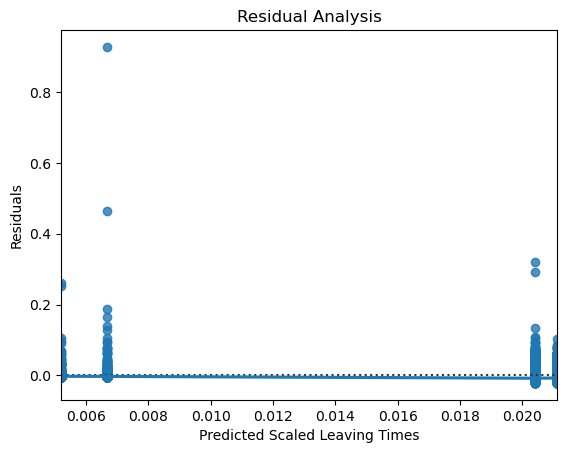

Feature Importance: [0.00682931 0.99317069]
Baseline Mean Absolute Error: 0.015195927426934614


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler


# Convert OUT_TIME to datetime data type with 'coerce' option
past_in_out_data['OUT_TIME'] = pd.to_datetime(past_in_out_data['OUT_TIME'], errors='coerce')

# Remove rows with invalid datetime values
past_in_out_data = past_in_out_data.dropna(subset=['OUT_TIME'])

# Convert IN_TIME to datetime data type (assuming it's already in datetime format)
past_in_out_data['IN_TIME'] = pd.to_datetime(past_in_out_data['IN_TIME'])

# Calculate time differences and scale them
past_in_out_data['TIME_DIFF'] = (past_in_out_data['OUT_TIME'] - past_in_out_data['IN_TIME']).dt.total_seconds()

scaler = MinMaxScaler()
past_in_out_data['TIME_DIFF_SCALED'] = scaler.fit_transform(past_in_out_data[['TIME_DIFF']])




# Features and target variable
features = ['CON_SIZE','STATUS']
target = 'TIME_DIFF_SCALED'  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(past_in_out_data[features], past_in_out_data[target], test_size=0.3, random_state=45)

# Initialize and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=60, random_state=13)
model.fit(X_train, y_train)

# Predict scaled leaving times
predicted_scaled_leaving_times = model.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, predicted_scaled_leaving_times)
print(f'Mean Absolute Error: {mae}')

import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate MAE
predicted_scaled_leaving_times = model.predict(X_test)
mae = mean_absolute_error(y_test, predicted_scaled_leaving_times)
print(f'Mean Absolute Error: {mae}')

# Calculate MSE
mse = mean_squared_error(y_test, predicted_scaled_leaving_times)
print(f'Mean Squared Error: {mse}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# Calculate R-squared
r2 = r2_score(y_test, predicted_scaled_leaving_times)
print(f'R-squared: {r2}')

# Residual Analysis
residuals = y_test - predicted_scaled_leaving_times
sns.residplot(x=predicted_scaled_leaving_times, y=residuals, lowess=True)
plt.xlabel('Predicted Scaled Leaving Times')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

# Feature Importance
feature_importance = model.feature_importances_
print(f'Feature Importance: {feature_importance}')

# Compare to Baseline
baseline_pred = np.mean(y_train)  # Baseline prediction using mean of training data
baseline_mae = mean_absolute_error(y_test, np.full_like(y_test, baseline_pred))
print(f'Baseline Mean Absolute Error: {baseline_mae}')


In [107]:
import numpy as np

# Define the maximum values for area, row, bay, and level
max_area = yard_locations['Area'].max()
max_row = yard_locations['Row'].max()
max_bay = yard_locations['Bay'].max()
max_level = yard_locations['Level'].max()

# Define weights for priority score factors
priority_weights = {
    'container_size': 0.2,
    'status': 0.6,
    'scaled_time_diff': 0.2
}

# Define penalty weights for shuffling factors
shuffling_weights = {
    'distance': 0.4,
    'steps': 0.6
}

# Calculate priority score for a container placement
def calculate_priority_score(container_properties):
    # Extract container properties
    container_size = container_properties['container_size']
    status = container_properties['status']
    scaled_time_diff = container_properties['scaled_time_diff']
    
    # Calculate priority score using weighted sum
    priority_score = (
        priority_weights['container_size'] * container_size +
        priority_weights['status'] * status +
        priority_weights['scaled_time_diff'] * scaled_time_diff
    )
    return priority_score

# Calculate shuffling penalty for a container placement
def calculate_shuffling_penalty(current_position, expected_position):
    # Calculate Euclidean distance
    distance = np.linalg.norm(np.array(current_position) - np.array(expected_position))
    
    # Calculate penalty based on distance and steps
    shuffling_penalty = (
        shuffling_weights['distance'] * distance +
        shuffling_weights['steps'] * max(abs(current_position[0] - expected_position[0]),
                                         abs(current_position[1] - expected_position[1]),
                                         abs(current_position[2] - expected_position[2]),
                                         abs(current_position[3] - expected_position[3]))
    )
    return shuffling_penalty
def get_expected_position(container):
    # Get the container's CON_NUM
    con_num = container['CON_NUM']
    
    # Find the past entry in the yard for the given CON_NUM
    past_entry = past_in_out_data[past_in_out_data['CON_NUM'] == con_num].iloc[-1]
    
    # Get the expected area, row, bay, and level based on the past entry's Location
    location = past_entry['Location']
    expected_area = yard_locations[yard_locations['Location'] == location]['Area'].values[0]
    expected_row = yard_locations[yard_locations['Location'] == location]['Row'].values[0]
    expected_bay = yard_locations[yard_locations['Location'] == location]['Bay'].values[0]
    expected_level = yard_locations[yard_locations['Location'] == location]['Level'].values[0]
    
    return expected_area, expected_row, expected_bay, expected_level

    
    return expected_area, expected_row, expected_bay, expected_level
def find_container_by_id(container_id):
    for container in incoming_container:
        if container['CON_NUM'] == container_id:
            return container
    return None



In [101]:
incoming_container.dtypes

ID                   int64
IN_TIME     datetime64[ns]
REF_ID              object
CON_NUM             object
CON_SIZE             int64
STATUS              object
dtype: object